In [1]:
import chemprop
## https://github.com/chemprop/chemprop/issues/113

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from chemprop import train
from chemprop.args import TrainArgs, PredictArgs

In [3]:
from chemprop.data import get_task_names, get_data
from chemprop.utils import create_logger
from chemprop.utils import load_args, load_checkpoint, load_task_names

## Data borrowed from original repo
- `!wget https://raw.githubusercontent.com/chemprop/chemprop/master/tests/data/classification.csv`

In [4]:
data_path = './classification.csv'
dataset_type = 'classification'
epochs = 25
ensemble_size=1

RDKit WARNING: [10:21:54] WARNING: not removing hydrogen atom without neighbors


,smiles,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,ROMol
0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,
1,CCN1C(=O)NC(c2ccccc2)C1=O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,
2,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,
3,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,
4,CC(O)(P(=O)(O)O)P(=O)(O)O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
5,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,
6,O=S(=O)(Cl)c1ccccc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
7,O=C(O)Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1,0.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,
8,OC[C@H](O)[C@@H](O)[C@H](O)CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,
9,CCCCCCCC(=O)[O-].CCCCCCCC(=O)[O-].[Zn+2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,

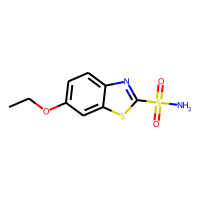
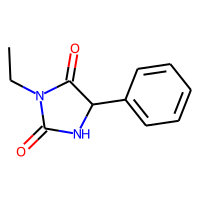
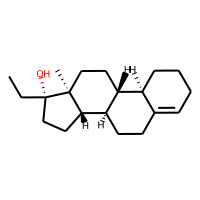
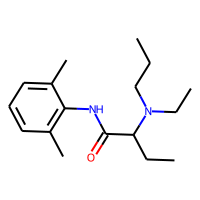
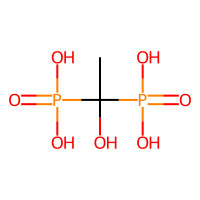
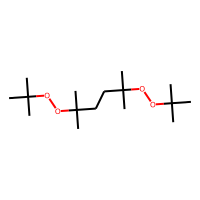
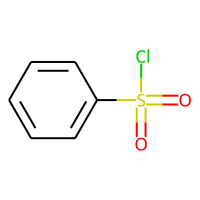
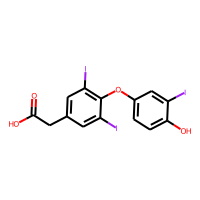
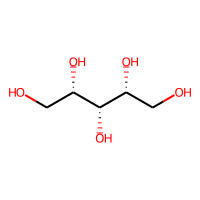
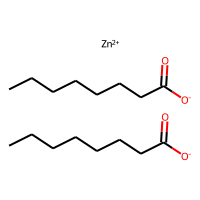

In [5]:
df = pd.read_csv('./classification.csv')
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
df.head(10)

In [6]:
args = TrainArgs().parse_args([
        '--data_path', data_path,
        '--dataset_type', dataset_type,
        '--epochs', str(epochs),
        '--ensemble_size', str(ensemble_size),
    ])

In [7]:
args.task_names = get_task_names('./classification.csv', smiles_columns=['smiles'])
args.save_dir = './result/'

In [8]:
data = get_data('./classification.csv', smiles_columns=['smiles'])

500it [00:00, 30392.63it/s]
  0%|          | 0/500 [00:00<?, ?it/s]RDKit WARNING: [10:22:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:22:01] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 500/500 [00:00<00:00, 2479.32it/s]


In [9]:
targets = data.targets()

In [10]:
logger = create_logger(name='trainlog', save_dir='./result', quiet=False)

In [11]:
train_scores = train.run_training(args, data, logger)[args.metrics[0]]

Splitting data with seed 0
Class sizes
NR-AR 0: 96.64%, 1: 3.36%
NR-AR-LBD 0: 97.72%, 1: 2.28%
NR-AhR 0: 85.71%, 1: 14.29%
NR-Aromatase 0: 95.86%, 1: 4.14%
NR-ER 0: 86.95%, 1: 13.05%
NR-ER-LBD 0: 94.41%, 1: 5.59%
NR-PPAR-gamma 0: 95.64%, 1: 4.36%
SR-ARE 0: 83.47%, 1: 16.53%
SR-ATAD5 0: 95.02%, 1: 4.98%
SR-HSE 0: 92.93%, 1: 7.07%
SR-MMP 0: 85.79%, 1: 14.21%
SR-p53 0: 91.53%, 1: 8.47%
Total size = 500 | train size = 400 | val size = 50 | test size = 50
Building model 0
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout_layer): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (ffn): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=

100%|██████████| 8/8 [00:00<00:00, 38.57it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]RDKit WARNING: [10:22:13] WARNING: not removing hydrogen atom without neighbors

                                     Validation auc = 0.762861
 60%|██████    | 15/25 [00:04<00:02,  3.56it/s]Epoch 15

100%|██████████| 8/8 [00:00<00:00, 35.26it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]RDKit WARNING: [10:22:14] WARNING: not removing hydrogen atom without neighbors

                                     Validation auc = 0.757797
 64%|██████▍   | 16/25 [00:05<00:02,  3.62it/s]Epoch 16

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 1.9219e-01, PNorm = 34.8059, GNorm = 0.1699, lr_0 = 2.3714e-04

100%|██████████| 8/8 [00:00<00:00, 34.52it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]RDKit WARNING: [10:22:14] WARNING: not removing hydrogen atom without neighbors

                      

In [12]:
args

TrainArgs(prog='ipykernel_launcher.py', usage=None, description=None, formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)

In [13]:
ckpt_args = load_checkpoint('./result/model_0/model.pt')

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda


In [14]:
arguments = [
        '--test_path', 'None',
        '--preds_path', './pred.txt',
        '--checkpoint_paths', './result/model_0/model.pt'
    ]
preargs = PredictArgs().parse_args(arguments)

In [15]:
train.make_predictions(preargs, smiles=[['CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12'],['c1ccnc2cc(F)ccc12']])

  0%|          | 0/1 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 2
Predicting with an ensemble of 1 models



  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

Saving predictions to ./pred.txt
Elapsed time = 0:00:00


[[0.027878377586603165,
  0.01715395227074623,
  0.11790101230144501,
  0.03493276610970497,
  0.12437887489795685,
  0.0511559434235096,
  0.03657782822847366,
  0.14042814075946808,
  0.0424322709441185,
  0.06105976179242134,
  0.12790092825889587,
  0.07036412507295609],
 [0.04332806169986725,
  0.0270235575735569,
  0.6065372824668884,
  0.07215214520692825,
  0.28268370032310486,
  0.11256735026836395,
  0.1029323935508728,
  0.32641899585723877,
  0.19343118369579315,
  0.10197479277849197,
  0.4615192115306854,
  0.12416951358318329]]

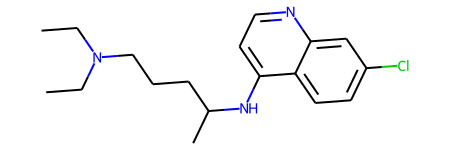

In [16]:
Chem.MolFromSmiles('CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12')